<a href="https://colab.research.google.com/github/Disha-16/earthquake_prediction/blob/main/Earthquake_analysis_using_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Earthquake analysis and EDA/earthquake_1995-2023.csv')
dataset

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


Data preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [4]:
del dataset["title"]

In [5]:
del dataset["location"]

In [6]:
del dataset["country"]

In [7]:
del dataset["continent"]

In [8]:
dataset


,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270
996,7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000
997,6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270
998,6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950


Checking for null values

In [9]:
dataset.isnull().sum()

magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
dtype: int64

In [10]:
##dataset["alert"].value_counts()

Handling missing values

In [11]:
dataset["alert"] = dataset["alert"].fillna("red")
dataset.isnull().sum()

magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [12]:
dataset

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,7.3,16-07-2023 06:48,0,5,red,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,27-05-1995 13:03,0,9,red,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270
996,7.7,16-05-1995 20:12,0,4,red,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000
997,6.9,14-05-1995 11:33,0,6,red,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270
998,6.6,13-05-1995 08:47,0,9,red,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950


Changing datatype of datetime column

In [13]:
dataset["date_time"]=pd.to_datetime(dataset["date_time"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   magnitude  1000 non-null   float64       
 1   date_time  1000 non-null   datetime64[ns]
 2   cdi        1000 non-null   int64         
 3   mmi        1000 non-null   int64         
 4   alert      1000 non-null   object        
 5   tsunami    1000 non-null   int64         
 6   sig        1000 non-null   int64         
 7   net        1000 non-null   object        
 8   nst        1000 non-null   int64         
 9   dmin       1000 non-null   float64       
 10  gap        1000 non-null   float64       
 11  magType    1000 non-null   object        
 12  depth      1000 non-null   float64       
 13  latitude   1000 non-null   float64       
 14  longitude  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(3)
memory usage: 117.3+ KB


<ipython-input-13-30fbe3c2a313>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset["date_time"]=pd.to_datetime(dataset["date_time"])


In [14]:
dataset["date_time"]=pd.DatetimeIndex(dataset["date_time"]).month

In [15]:
#dataset.describe()
dataset.describe(include=['object'])

,alert,net,magType
count,1000,1000,1000
unique,4,11,9
top,red,us,mww
freq,564,960,502


In [ ]:
#dataset.magType.value_counts()

Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
alert_le = LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
dataset["alert"]=alert_le.fit_transform(dataset["alert"])
dataset["magType"]=magtype_le.fit_transform(dataset["magType"])
dataset["net"]=net_le.fit_transform(dataset["net"])
dataset

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,8,7,4,0,0,657,9,114,7.177000,25.0,8,192.955,-13.8814,167.1580
1,6.5,7,8,6,3,0,775,9,92,0.679000,40.0,8,69.727,12.8140,-88.1265
2,6.6,7,7,5,0,0,899,9,70,1.634000,28.0,8,171.371,-38.1911,-70.3731
3,7.2,7,6,6,0,1,860,9,173,0.907000,36.0,8,32.571,54.3844,-160.6990
4,7.3,7,0,5,2,1,820,1,79,0.879451,172.8,0,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,5,0,9,2,0,776,9,0,0.000000,0.0,6,11.000,52.6290,142.8270
996,7.7,5,0,4,2,0,912,9,0,0.000000,0.0,5,20.200,-23.0080,169.9000
997,6.9,5,0,6,2,0,732,9,0,0.000000,0.0,5,11.200,-8.3780,125.1270
998,6.6,5,0,9,2,0,670,9,0,0.000000,0.0,5,14.000,40.1490,21.6950


In [17]:
dataset.corr()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
magnitude,1.000000,-0.002377,0.163170,0.282275,0.128771,-0.001213,0.512358,-0.092200,0.091427,-0.081518,-0.087029,0.039769,0.017083,-0.017505,-0.010710
date_time,-0.002377,1.000000,-0.044438,-0.020199,0.035149,-0.046815,-0.038267,0.013158,0.001621,-0.000968,-0.053090,0.019732,0.036475,-0.040099,0.035923
cdi,0.163170,-0.044438,1.000000,0.197458,-0.142914,0.292202,0.479911,-0.072677,-0.003857,0.140505,0.277689,0.364859,-0.051331,0.065383,-0.132190
mmi,0.282275,-0.020199,0.197458,1.000000,0.401446,-0.175441,0.398149,-0.092208,0.110260,-0.307331,-0.068503,-0.088883,-0.517002,0.180799,-0.019398
alert,0.128771,0.035149,-0.142914,0.401446,1.000000,-0.567999,0.162161,-0.060643,0.401044,-0.505868,-0.125896,-0.424028,-0.245834,0.201746,0.080392
tsunami,-0.001213,-0.046815,0.292202,-0.175441,-0.567999,1.000000,0.024848,-0.027380,-0.426026,0.443179,0.236259,0.372177,0.070705,-0.127002,-0.131340
sig,0.512358,-0.038267,0.479911,0.398149,0.162161,0.024848,1.000000,-0.189131,0.016636,-0.051440,0.158853,0.067219,-0.079263,0.177575,-0.164200
net,-0.092200,0.013158,-0.072677,-0.092208,-0.060643,-0.027380,-0.189131,1.000000,0.105831,0.082110,-0.177788,0.332509,0.050231,-0.262491,0.253618
nst,0.091427,0.001621,-0.003857,0.110260,0.401044,-0.426026,0.016636,0.105831,1.000000,-0.402445,0.003023,-0.139414,-0.103897,0.109991,0.156543
dmin,-0.081518,-0.000968,0.140505,-0.307331,-0.505868,0.443179,-0.051440,0.082110,-0.402445,1.000000,0.091388,0.350700,0.192698,-0.239791,-0.075595


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'date_time'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>],
       [<Axes: title={'center': 'alert'}>,
        <Axes: title={'center': 'tsunami'}>,
        <Axes: title={'center': 'sig'}>, <Axes: title={'center': 'net'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'magType'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

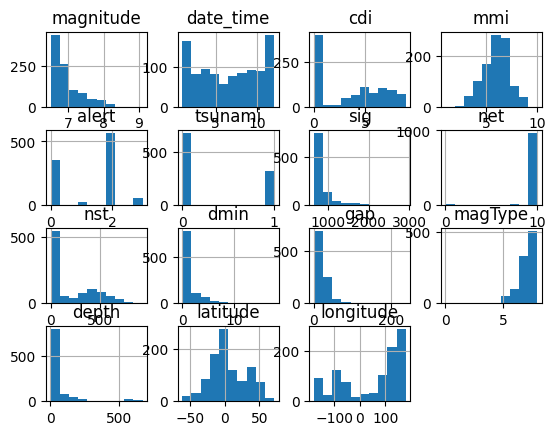

In [18]:
dataset.hist()

In [19]:
x=dataset.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13,14]]
y=dataset.iloc[:,[5]]

Balancing data using imbalanced techniques

In [20]:
dataset["tsunami"].value_counts()

tsunami
0    675
1    325
Name: count, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [22]:
from collections import Counter
print(Counter(y_data))

Counter({'tsunami': 1})


Feature selection

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)

In [24]:
x_scaled

array([[ 0.47777896,  0.97719157, -1.27927927, ...,  0.86858617,
        -0.6288062 ,  0.98904107],
       [ 0.17777822,  1.28987434,  0.11573447, ..., -0.04922692,
         0.37367207, -1.09589681],
       [ 0.17777822,  0.97719157, -0.5817724 , ...,  0.70782662,
        -1.54169554, -0.95090275],
       ...,
       [ 0.47777896, -0.58622229, -0.5817724 , ..., -0.1907077 ,
        -0.25608526,  0.79126507],
       [ 0.7777797 ,  0.97719157, -0.5817724 , ..., -0.4979361 ,
         0.83085349, -1.26379742],
       [-1.02222475, -0.89890506, -1.27927927, ..., -0.49724896,
        -0.81302719, -1.83155242]])

Developing the model

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=30,test_size=0.2)

Creating models

1.Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

l1=LogisticRegression()
l1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
y_pred=l1.predict(x_test)
y_pred


array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[113  18]
 [ 18 121]]


In [30]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.87
Recall: 0.87
F1 Score: 0.87


In [31]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

86.66666666666667

2.SVM

In [32]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=2)

In [33]:
y_pred1=SVM.predict(x_test)
y_pred1

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [35]:
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[112  19]
 [ 15 124]]


In [36]:
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.87
Recall: 0.89
F1 Score: 0.88


In [37]:
ac1=accuracy_score(y_test,y_pred1)*100
ac1

87.4074074074074

3.Gaussian Nayev Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
y_pred2=nb.predict(x_test)
y_pred2

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [40]:
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[111  20]
 [ 20 119]]


In [41]:
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.86
Recall: 0.86
F1 Score: 0.86


In [42]:
ac2=accuracy_score(y_test,y_pred2)*100
ac2

85.18518518518519

4.Decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred3=dt.predict(x_test)
y_pred3

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1])

In [45]:
cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[123   8]
 [ 11 128]]


In [46]:
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.94
Recall: 0.92
F1 Score: 0.93


In [47]:
ac3 = accuracy_score(y_test, y_pred3)*100
ac3

92.96296296296296

In [48]:
models = ["Logistic Regression","SVM","Gaussian Naive Bayes","Decision tree"]
accuracies = [ac,ac1,ac2,ac3]

Text(0.5, 1.0, 'Accuracy Comparison Graph')

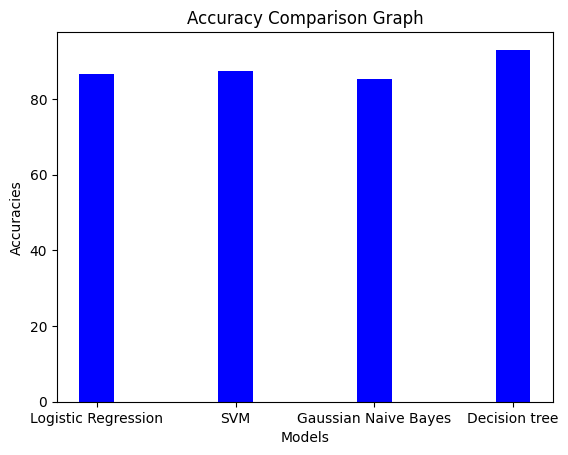

In [49]:
plt.bar(models, accuracies, color ='blue',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison Graph")


Ensemble technique

In [50]:
from sklearn.ensemble import VotingClassifier
bc=VotingClassifier(estimators=[("logisticRegression",l1),("svm",SVM),("naivebayes",nb),("Decision Tree Classification", dt)])
bc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('logisticRegression', LogisticRegression()),
                             ('svm', SVC(kernel='linear', random_state=2)),
                             ('naivebayes', GaussianNB()),
                             ('Decision Tree Classification',
                              DecisionTreeClassifier())])

In [51]:
y_pred4=bc.predict(x_test)
y_pred4

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [52]:
cm = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[114  17]
 [ 17 122]]


In [53]:
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.88
Recall: 0.88
F1 Score: 0.88


In [54]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred4)*100
ac4

87.4074074074074

cross validation using KFold techniques

In [55]:
from sklearn.model_selection import KFold
kf=KFold()
kf.split(x_train,y_train)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [56]:
# k= 7
# kf = KFold(n_splits=k, shuffle=True)
# kf

In [57]:
from sklearn.model_selection import cross_val_predict
cross_pred=cross_val_predict(bc,x_test,y_test,cv=kf)
cross_pred

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1])

In [58]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(bc,x_train,y_train,cv=kf)
cross_score

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

array([0.87037037, 0.86574074, 0.84259259, 0.88425926, 0.81944444])

In [59]:
ac5=cross_score.mean()*100
ac5

85.64814814814815